In [112]:
from sklearn.datasets import load_breast_cancer
import numpy as np
np.set_printoptions(legacy='1.25')

breast_cancer = load_breast_cancer()

In [ ]:
print(breast_cancer.DESCR)

# Dataset Info

In [143]:
breast_cancer.data.shape

(569, 30)

In [114]:
breast_cancer.target[360]

1

In [115]:
breast_cancer.target.shape

(569,)

In [116]:
breast_cancer.data[330]

array([1.603e+01, 1.551e+01, 1.058e+02, 7.932e+02, 9.491e-02, 1.371e-01,
       1.204e-01, 7.041e-02, 1.782e-01, 5.976e-02, 3.371e-01, 7.476e-01,
       2.629e+00, 3.327e+01, 5.839e-03, 3.245e-02, 3.715e-02, 1.459e-02,
       1.467e-02, 3.121e-03, 1.876e+01, 2.198e+01, 1.243e+02, 1.070e+03,
       1.435e-01, 4.478e-01, 4.956e-01, 1.981e-01, 3.019e-01, 9.124e-02])

In [117]:
breast_cancer.data.shape

(569, 30)

# Pre Processing

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target,test_size=0.2)

In [119]:
print(f"Features => (X_train) : {X_train.shape} - (X_test) : {X_test.shape}")
print(f"Labels => (y_train) : {y_train.shape} - (y_test) : {y_test.shape}")

Features => (X_train) : (455, 30) - (X_test) : (114, 30)
Labels => (y_train) : (455,) - (y_test) : (114,)


In [120]:
X_train[0]

array([1.132e+01, 2.708e+01, 7.176e+01, 3.957e+02, 6.883e-02, 3.813e-02,
       1.633e-02, 3.125e-03, 1.869e-01, 5.628e-02, 1.210e-01, 8.927e-01,
       1.059e+00, 8.605e+00, 3.653e-03, 1.647e-02, 1.633e-02, 3.125e-03,
       1.537e-02, 2.052e-03, 1.208e+01, 3.375e+01, 7.982e+01, 4.523e+02,
       9.203e-02, 1.432e-01, 1.089e-01, 2.083e-02, 2.849e-01, 7.087e-02])

# Normilize

In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [122]:
X_train[0]

array([0.20535757, 0.57785467, 0.19328312, 0.10697773, 0.14624898,
       0.05751181, 0.03826148, 0.01553181, 0.40858586, 0.1279661 ,
       0.00239252, 0.15060241, 0.01422984, 0.00336759, 0.03464146,
       0.13651726, 0.1135605 , 0.07640587, 0.10536388, 0.050288  ,
       0.14763429, 0.57381916, 0.14647144, 0.06564589, 0.07860007,
       0.12049846, 0.09307692, 0.07175336, 0.25310467, 0.13419803])

# Classification

In [123]:
def calculate_metric(y_train, y_test, y_pred_train, y_pred_test):
    from sklearn.metrics import accuracy_score,precision_score,recall_score

    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p= precision_score(y_true=y_test, y_pred=y_pred_test)
    r=recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc_train : {acc_train} - acc_test : {acc_test} - precision : {p} - recall : {r}")

    return acc_train, acc_test, p, r

## 1.Naive Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [125]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 0.9340659340659341 - acc_test : 0.8859649122807017 - precision : 0.9210526315789473 - recall : 0.9090909090909091


## 2.KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8,algorithm="kd_tree",leaf_size=28)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [127]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 0.9736263736263736 - acc_test : 0.9649122807017544 - precision : 0.974025974025974 - recall : 0.974025974025974


## 3. Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64 , min_samples_split=2, criterion="gini")
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=64)

In [129]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 1.0 - acc_test : 0.8771929824561403 - precision : 0.9315068493150684 - recall : 0.8831168831168831


## 4. Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000 , max_depth=32 , min_samples_split=4)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [131]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 1.0 - acc_test : 0.9473684210526315 - precision : 0.961038961038961 - recall : 0.961038961038961


## 5.SVM

In [132]:
from sklearn.svm import SVC

svm = SVC(kernel="poly")
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [133]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 0.9868131868131869 - acc_test : 0.9736842105263158 - precision : 0.9743589743589743 - recall : 0.987012987012987


## 6. Logostik Regression

In [134]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [135]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 0.9648351648351648 - acc_test : 0.9736842105263158 - precision : 0.9625 - recall : 1.0


## 7.ANN

In [136]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256,activation="relu",solver="adam",batch_size=64)
ann.fit(X_train,y_train)

c:\ML\learning_venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [137]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 0.989010989010989 - acc_test : 0.9824561403508771 - precision : 0.9746835443037974 - recall : 1.0


## Comparison

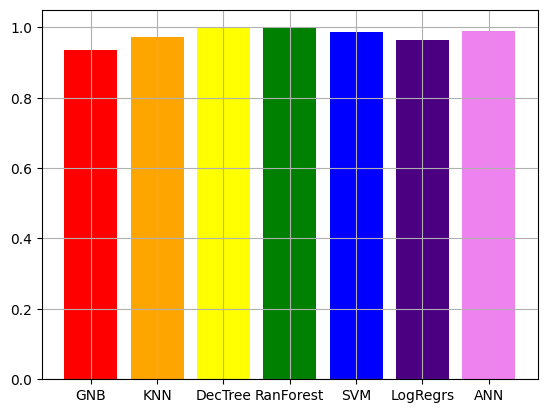

In [138]:
import matplotlib.pyplot as plt

acc_train=[acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB" , "KNN", "DecTree" , "RanForest" , "SVM" , "LogRegrs", "ANN"]
colors=["red", "orange", "yellow", "green", "blue", "indigo", "violet"]

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

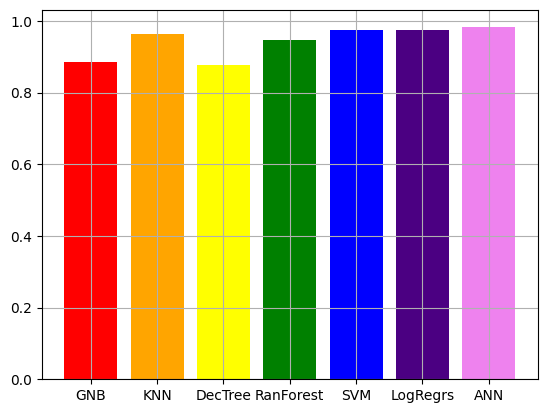

In [139]:
acc_test=[acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB" , "KNN", "DecTree" , "RanForest" , "SVM" , "LogRegrs", "ANN"]
colors=["red", "orange", "yellow", "green", "blue", "indigo", "violet"]

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

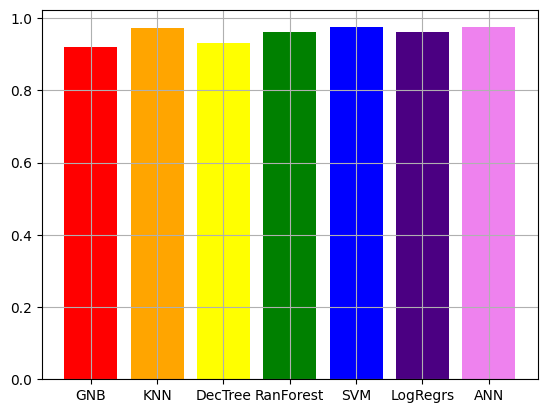

In [140]:
p=[p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB" , "KNN", "DecTree" , "RanForest" , "SVM" , "LogRegrs", "ANN"]
colors=["red", "orange", "yellow", "green", "blue", "indigo", "violet"]

plt.bar(title, p, color=colors)
plt.grid()
plt.show()

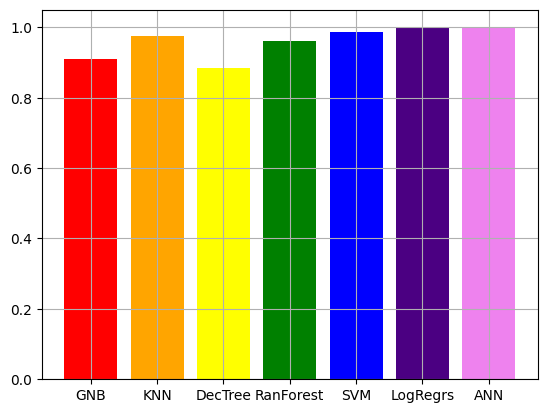

In [141]:
r=[r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB" , "KNN", "DecTree" , "RanForest" , "SVM" , "LogRegrs", "ANN"]
colors=["red", "orange", "yellow", "green", "blue", "indigo", "violet"]

plt.bar(title, r, color=colors)
plt.grid()
plt.show()